# Constructing ANN

### Importing Packages

In [65]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

In [66]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [67]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [69]:
data = pd.read_csv(r'C:\Users\rvbha\OneDrive\Desktop\Bank_Personal_Loan_Modelling.csv')

In [70]:
data.drop(['ID'],axis =1,inplace = True)
data.drop(['ZIP Code'],axis =1,inplace = True)

<Axes: >

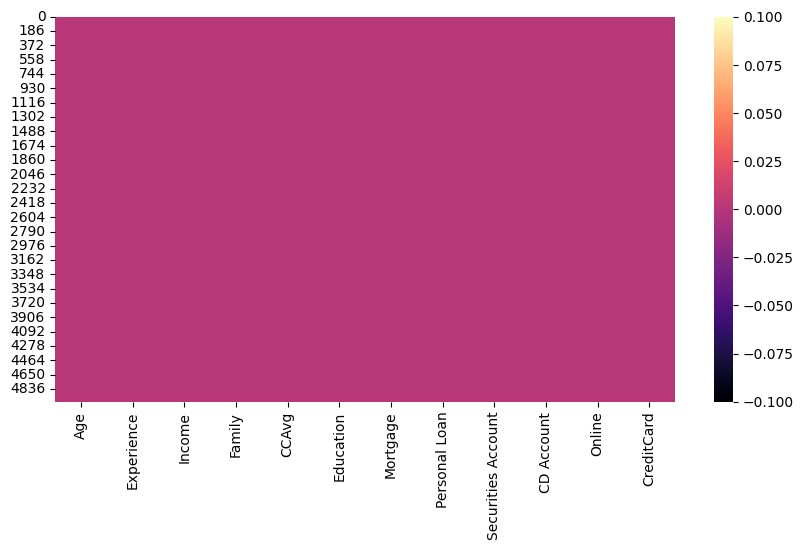

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isna(),cmap="magma")

feature :- Age


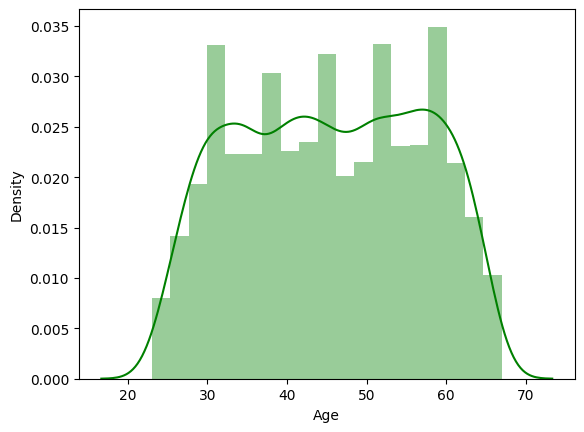

feature :- Experience


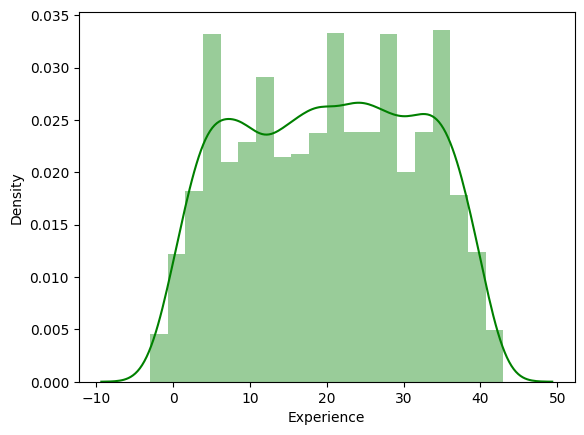

feature :- Income


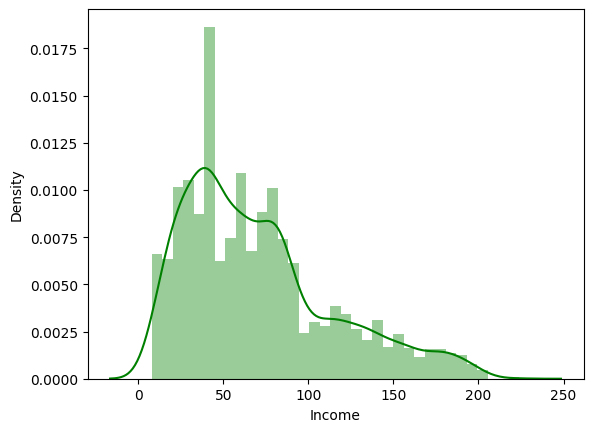

feature :- Family


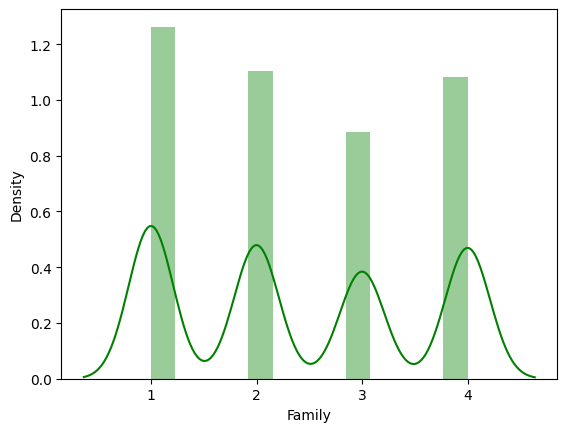

feature :- CCAvg


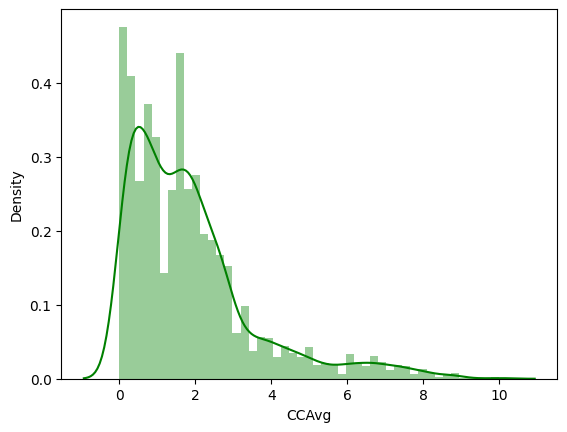

feature :- Education


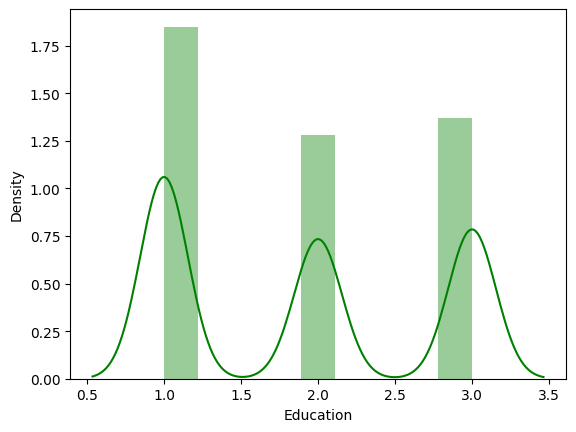

feature :- Mortgage


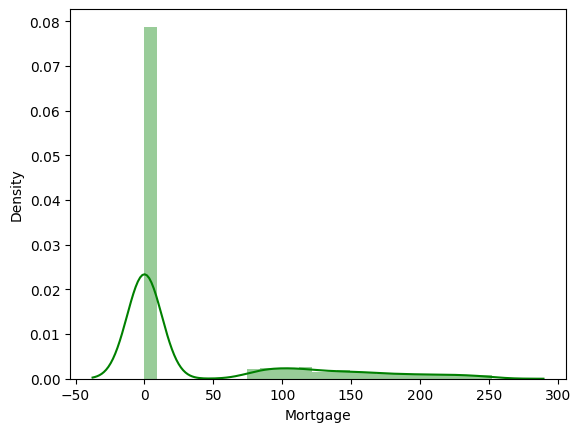

feature :- Personal Loan


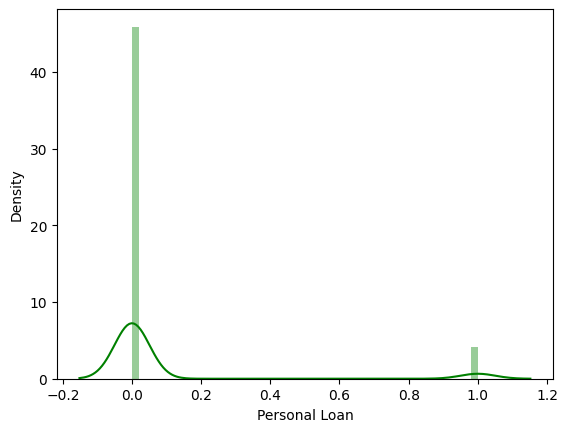

feature :- Securities Account


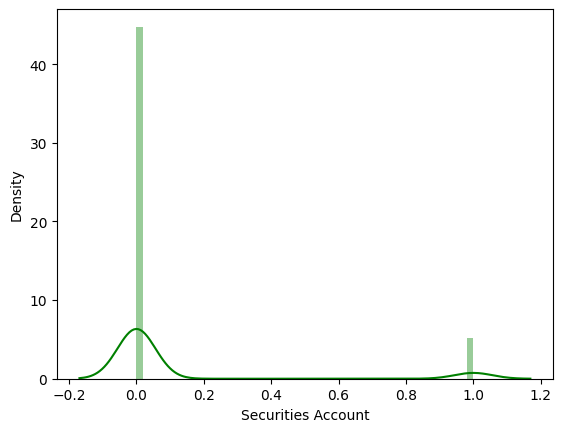

feature :- CD Account


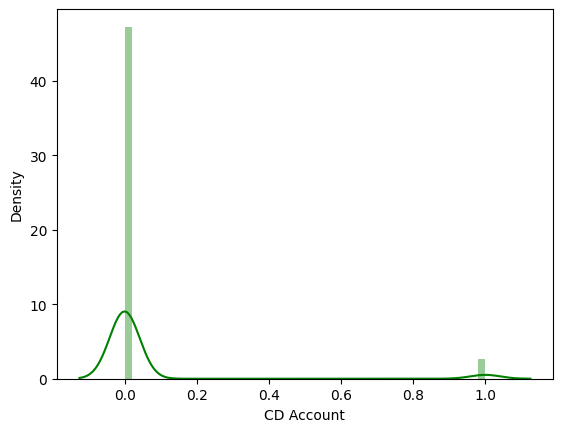

feature :- Online


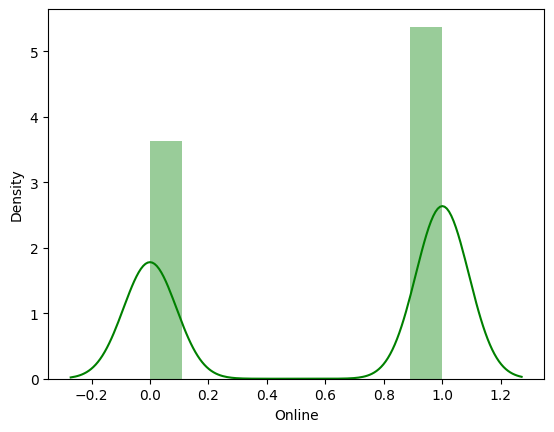

feature :- CreditCard


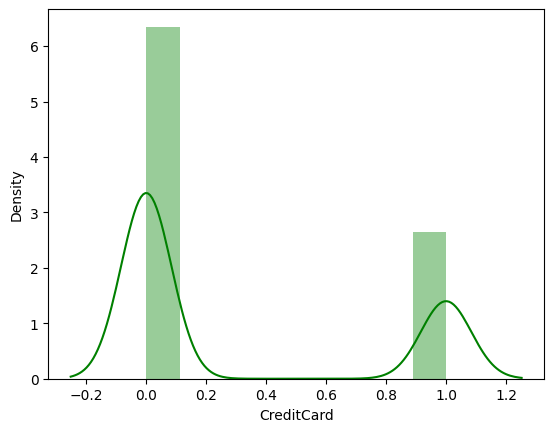

In [72]:
for i in df.columns:
    print("feature :-",i)
    sns.distplot(df[i],color='g')
    plt.show()

Text(0, 0.5, 'Age')

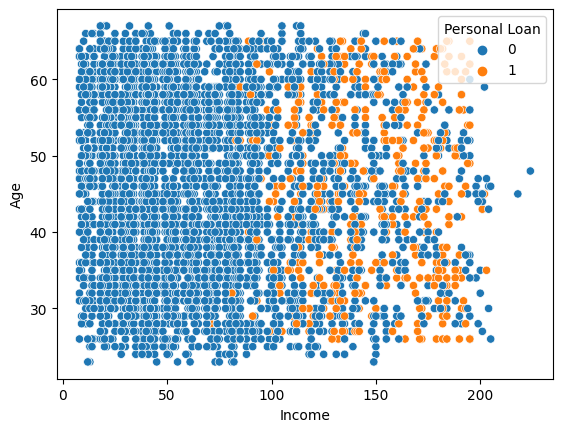

In [73]:
sns.scatterplot(x='Income', y='Age', hue='Personal Loan', data=data)
plt.xlabel('Income')
plt.ylabel('Age')

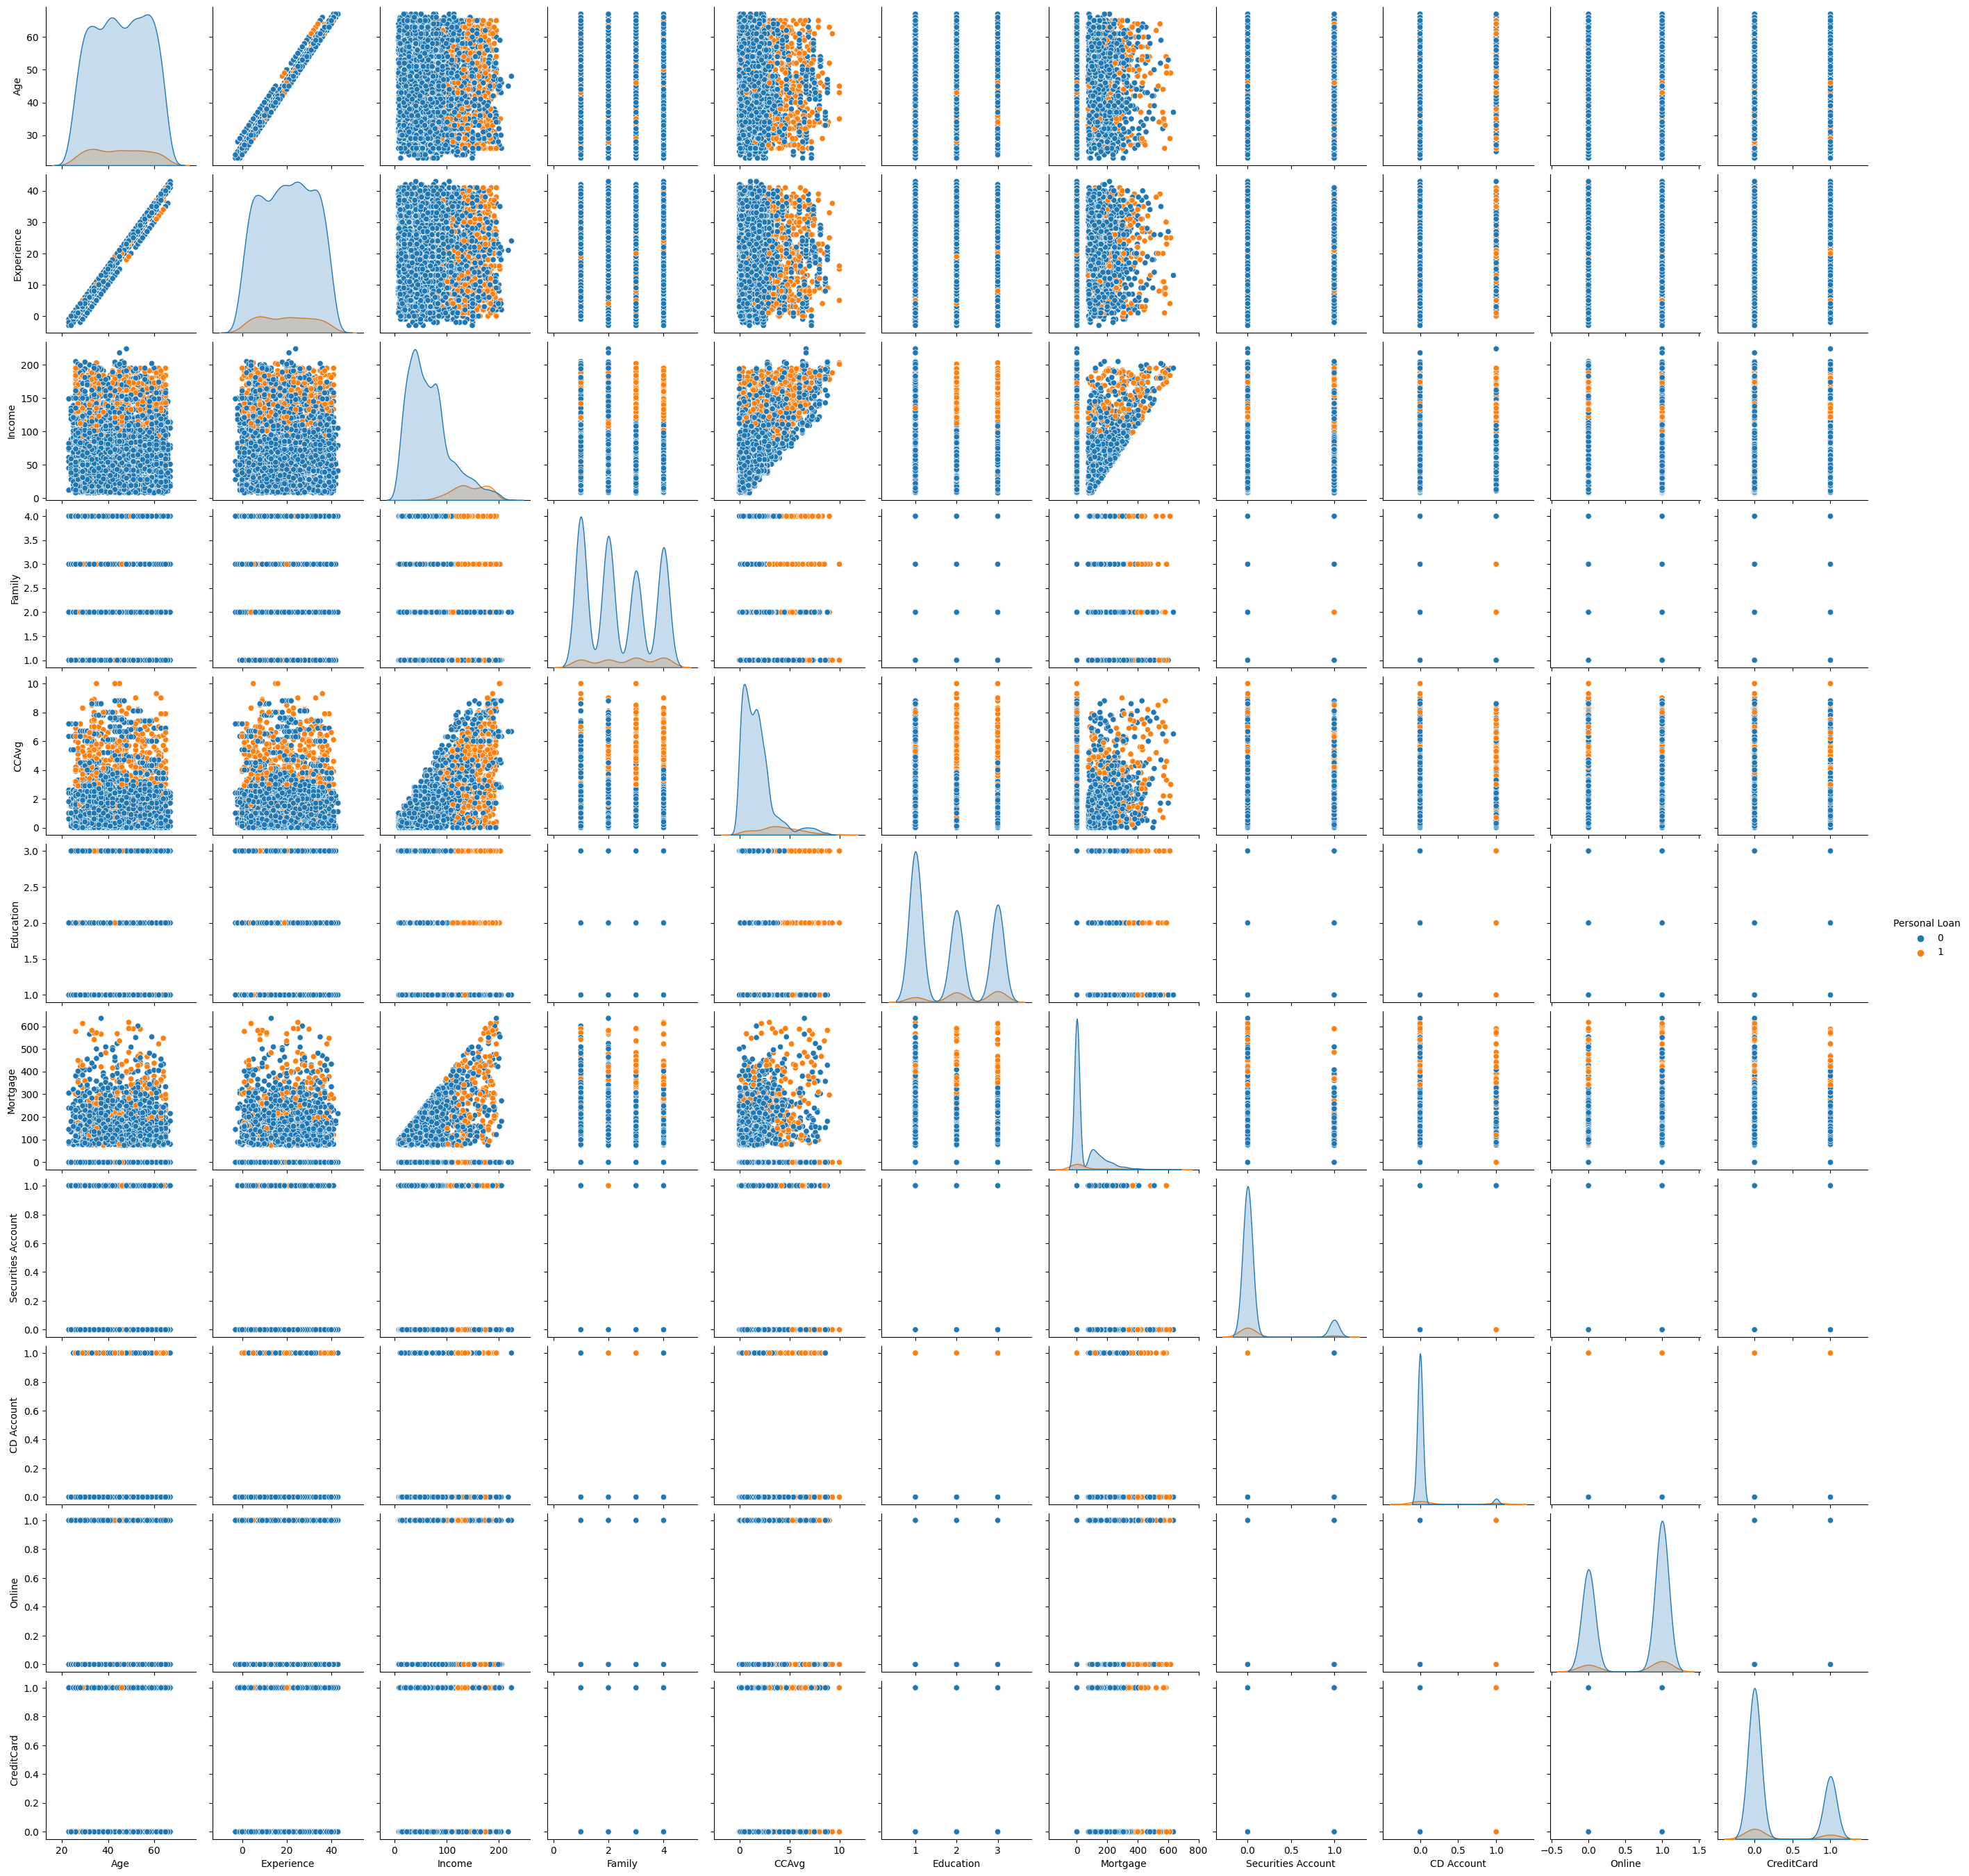

In [8]:
sns.pairplot(data,hue='Personal Loan')

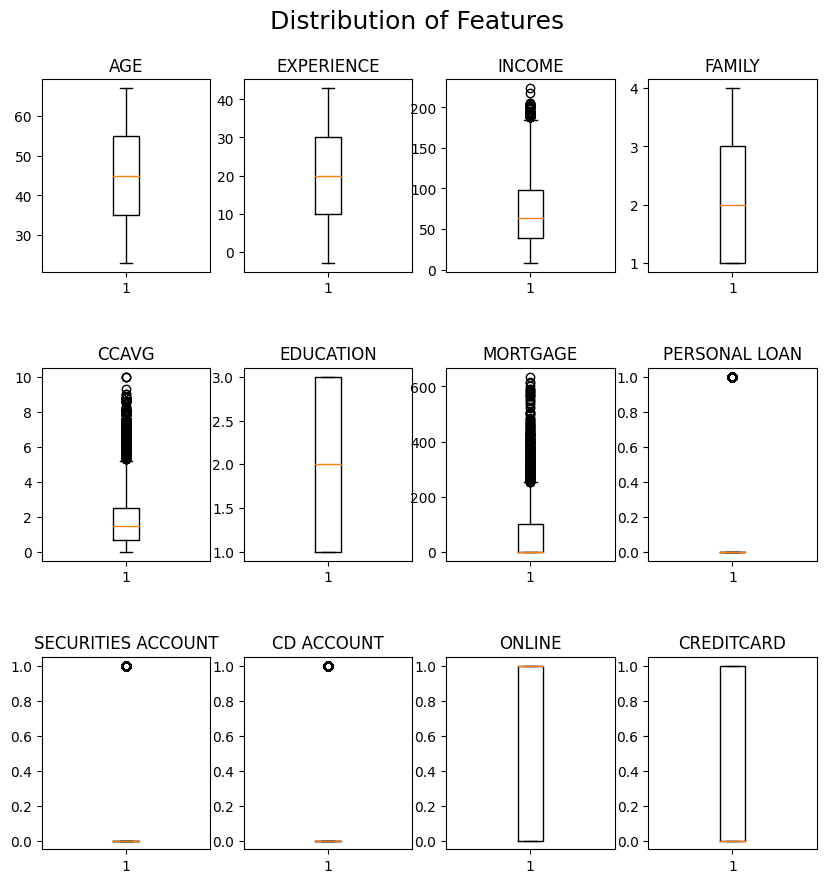

In [74]:
tickers = data.columns
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution of Features", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(tickers, axs.ravel()):
    # filter df for ticker and plot on specified axes
    ax.boxplot(data[ticker])

    # chart formatting
    ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

In [75]:
def IQR(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    data=data[(data[col]>lower) & (data[col]<upper)]
    return data

In [76]:
for i in ['Income', 'CCAvg', 'Mortgage']:
    df = IQR(data,i)

In [77]:
data['Personal Loan'].nunique()
data.shape

(5000, 12)

In [78]:
x = data.iloc[:,:]
x.shape

(5000, 12)

In [79]:
y  = data.iloc[:,8]
y.shape

(5000,)

In [80]:
std = StandardScaler()
x_std= std.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.33, random_state=42, stratify = y)
x_train, x_test, y_train.values, y_test.values

(array([[ 1.54088033,  1.64783451,  0.5914907 , ..., -0.25354028,
          0.82195086, -0.64531434],
        [ 1.27914634,  1.21179333,  0.61321608, ..., -0.25354028,
          0.82195086,  1.54963239],
        [-1.1637042 , -1.05562082,  0.52631458, ..., -0.25354028,
          0.82195086, -0.64531434],
        ...,
        [ 0.58118904,  0.51412744,  2.61195054, ..., -0.25354028,
          0.82195086, -0.64531434],
        [ 1.27914634,  1.21179333, -0.97273627, ..., -0.25354028,
          0.82195086, -0.64531434],
        [ 0.40669972,  0.33971096,  2.28606993, ..., -0.25354028,
          0.82195086, -0.64531434]]),
 array([[-0.11676826, -0.00912198,  2.3077953 , ..., -0.25354028,
         -1.21661774,  1.54963239],
        [-1.33819353, -1.40445376, -1.05963777, ..., -0.25354028,
         -1.21661774, -0.64531434],
        [-0.72748089, -0.61957964, -0.21234816, ..., -0.25354028,
          0.82195086, -0.64531434],
        ...,
        [ 0.66843371,  0.77575215,  1.46050569, ..., -

In [89]:
model = Sequential()
model.add(Dense(11, input_shape=(12,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [90]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
335/335 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.9197
Epoch 2/10
335/335 [==============================] - 1s 2ms/step - loss: 0.1077 - accuracy: 0.9893
Epoch 3/10
335/335 [==============================] - 1s 2ms/step - loss: 0.0342 - accuracy: 0.9988
Epoch 4/10
335/335 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 5/10
335/335 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 6/10
335/335 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 7/10
335/335 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/10
335/335 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/10
335/335 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/10
335/335 [==============================] - 1s 2ms/step - loss: 7.8955e-04 - accuracy: 1.

In [92]:
tf_pred = model.predict(x_test)


52/52 [==============================] - 0s 2ms/step


In [93]:

tf_y_pred = tf_pred>0.5
tf_y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [85]:
from sklearn.metrics import accuracy_score

In [88]:
tf_model_accuracy = accuracy_score(y_test,tf_y_pred)
tf_model_accuracy

1.0

In [94]:
accuracy = model.evaluate(x, y)
accuracy_tf = accuracy[1]*100
print("The accuracy of NN model using keras is {} percent".format(accuracy[1]*100))

157/157 [==============================] - 1s 3ms/step - loss: 8.9446 - accuracy: 0.8956
The accuracy of NN model using keras is 89.56000208854675 percent


# Optimising the keras model with Genetic Algorithm using Pygad

## Importing PyGad

In [ ]:
import pygad.kerasga
kga = pygad.kerasga.KerasGA(model = model,num_solutions = 5)

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 11)                143       
                                                                 
 dense_27 (Dense)            (None, 64)                768       
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,440
Trainable params: 1,440
Non-trainable params: 0
_________________________________________________________________


# Defining Fitness Function

#### Population of the Genetic algorithm is the  1440 weights of our ANN and each Chromosomes represents weight of each Neurons

#### Weights of the ANN are expressed in matrix and the population of the GA is expressed in a single vector

#### so before passing it to the fitness function(accuracy of the model) we need to convert the matrix to vector

In [55]:
def fitness_fun(solution,index):
    global x,y,kga,model
    
    model_wt_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                            weights_vector=solution)
    
    model.set_weights(weights = model_wt_matrix)
    
    prediction = model.predict(x)
    
    bce = tf.keras.losses.BinaryCrossentropy()
    
    error = bce(y,prediction).numpy()
    
    fitness = 1.0/(error + 0.0000001)
    
    return fitness

## Instantiating the pygad.kerasga.KerasGa Class

In [56]:
import pygad.kerasga
kga = pygad.kerasga.KerasGA(model = model,num_solutions = 5)

In [57]:
def cur_gen(ga_instance):
    print("Generation = {generation}".format(generation = ga_instance.generations_completed))
    print("Fitness = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]))

## Instantiating the 'pygad.GA' Class

In [59]:
ga_instance = pygad.GA(num_generations = 50,
                       num_parents_mating=5,
                       fitness_func=fitness_fun,
                       initial_population=kga.population_weights,
                       on_generation=cur_gen,
                       suppress_warnings=True)

In [60]:
ga_instance.run()

157/157 [==============================] - 0s 1ms/step
Generation = 1
Fitness = 0.6231992737611363
157/157 [==============================] - 0s 1ms/step
Generation = 2
Fitness = 0.6231992737611363
157/157 [==============================] - 0s 1ms/step
Generation = 3
Fitness = 0.6231992737611363
157/157 [==============================] - 0s 1ms/step
Generation = 4
Fitness = 0.6231992737611363
157/157 [==============================] - 0s 1ms/step
Generation = 5
Fitness = 0.6231992737611363
157/157 [==============================] - 0s 1ms/step
Generation = 6
Fitness = 0.6231992737611363
157/157 [==============================] - 0s 1ms/step
Generation = 7
Fitness = 0.6231992737611363
157/157 [==============================] - 0s 1ms/step
Generation = 8
Fitness = 0.6231992737611363
157/157 [==============================] - 0s 1ms/step
Generation = 9
Fitness = 0.6231992737611363
157/157 [==============================] - 0s 1ms/step
Generation = 10
Fitness = 0.6231992737611363
157/157 [

In [61]:
solution,fitness,_ = ga_instance.best_solution()

157/157 [==============================] - 0s 1ms/step


In [62]:
print("length of the solution is : ",len(solution),end ='\n')
print("fitness value of the best solution : {solution_fitness}".format(solution_fitness=fitness),end='\n')

length of the solution is :  1440
fitness value of the best solution : 0.6232527990611213


In [63]:
best_weights = pygad.kerasga.model_weights_as_matrix(model=model,weights_vector=solution)

model.set_weights(best_weights)
predictions = model.predict(x)
predictions

157/157 [==============================] - 0s 1ms/step


array([[0.0000000e+00],
       [0.0000000e+00],
       [6.2777805e-16],
       ...,
       [2.2448146e-25],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

## Measuring Loss and Accuracy

In [99]:
bce = tf.keras.losses.BinaryCrossentropy()
bac = tf.keras.metrics.BinaryAccuracy()
print("Binary Loss : ",bce(y,predictions).numpy(),end = '\n')
bac.reset_states()
bac.update_state(y, predictions)
accuracy = bac.result().numpy()

print("Accuracy : {} Percent".format(accuracy*100))

Binary Loss :  1.6044853
Accuracy : 89.4599974155426 Percent
